In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
# Define a function
def f(x, y, a=0):
    return x**2 + y**2 + a * x*y

def hessian_matrix(a):
    return np.array([[2, a],
                     [a, 2]])

def determinant(H):
    det = np.linalg.det(H)
    return det

def eigenvalues(H):
    eigvals = np.linalg.eigvals(H)
    return eigvals

def eigenvectors(H):
    eigvals, eigvecs = np.linalg.eig(H)
    return eigvecs

In [3]:
# Define parameters
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = f(X, Y, a=0)
Z2 = f(X, Y, a=1)
Z3 = f(X, Y, a=2)
Z4 = f(X, Y, a=3)

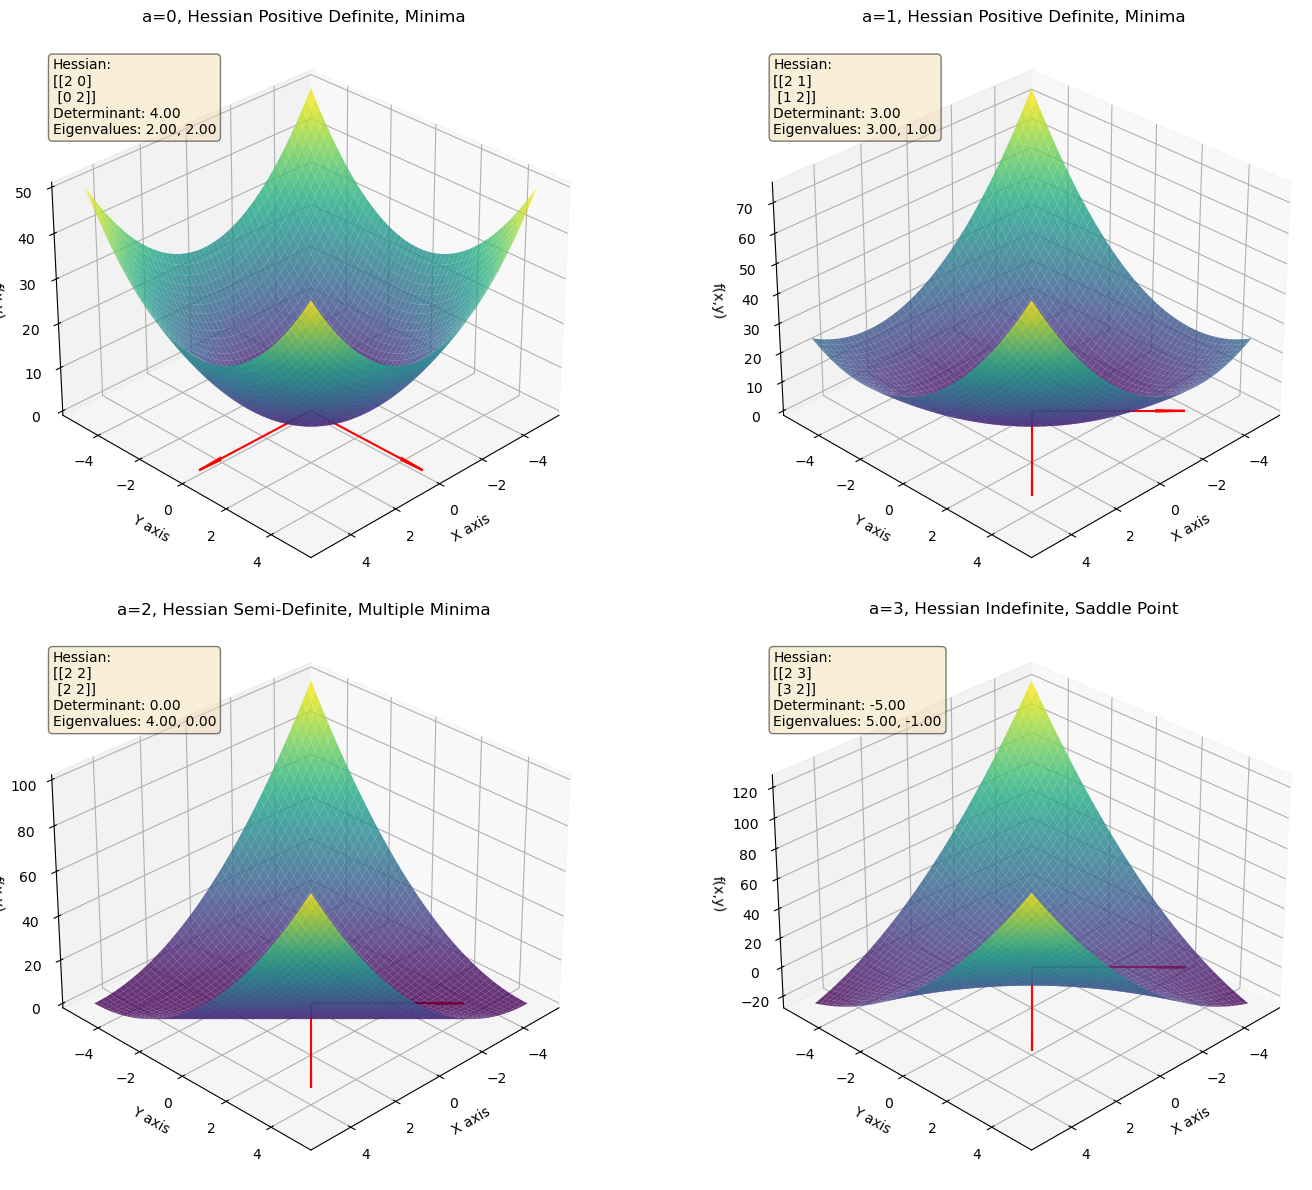

In [4]:
# Create figure and 3D axes
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# Plot surfaces
surf1 = ax1.plot_surface(X, Y, Z1, cmap='viridis', edgecolor='none', alpha=0.8)
surf2 = ax2.plot_surface(X, Y, Z2, cmap='viridis', edgecolor='none', alpha=0.8)
surf3 = ax3.plot_surface(X, Y, Z3, cmap='viridis', edgecolor='none', alpha=0.8)
surf4 = ax4.plot_surface(X, Y, Z4, cmap='viridis', edgecolor='none', alpha=0.8)

# Plot the eigenvectors at the origin for each case
origin = np.array([[0, 0, 0], [0, 0, 0]])  # origin points
a_values = [0, 1, 2, 3]
axes = [ax1, ax2, ax3, ax4]
for a, ax in zip(a_values, axes):
    H = hessian_matrix(a)
    eigvecs = eigenvectors(H)
    for vec in eigvecs.T:
        ax.quiver(0, 0, 0, vec[0], vec[1], 0, color='r', length=5, normalize=True, arrow_length_ratio=0.2, label='Eigenvector')

# Set titles and labels
ax1.set_title('a=0, Hessian Positive Definite, Minima')
ax2.set_title('a=1, Hessian Positive Definite, Minima')
ax3.set_title('a=2, Hessian Semi-Definite, Multiple Minima')
ax4.set_title('a=3, Hessian Indefinite, Saddle Point')
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('f(x,y)')
    ax.view_init(elev=30, azim=45)

# Calculate and display Hessian properties
a_values = [0, 1, 2, 3]
axes = [ax1, ax2, ax3, ax4]
for a, ax in zip(a_values, axes):
    H = hessian_matrix(a)
    det = determinant(H)
    eigvals = eigenvalues(H)
    eig_text = ', '.join([f'{val:.2f}' for val in eigvals])
    textstr = f'Hessian:\n{H}\nDeterminant: {det:.2f}\nEigenvalues: {eig_text}'
    ax.text2D(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show plots
plt.tight_layout()
plt.show()